In [1]:
#Import dependencies
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors as NN
import pydotplus
from IPython.display import Image
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
#read CSV file into a pandas DataFrame
coffee_data = pd.read_csv("coffee_venture1.csv", index_col=0)
coffee_data.head()

,title,rating,acidity_structure,aftertaste,aroma,body,flavor,blind_assessment,coffee_origin,est_price,notes,roast_level,roaster_location,City,State,Country
0,Bolivia Manantial Gesha,93.0,9.0,8.0,9.0,8.0,9.0,"Richly aromatic, floral-toned. Magnolia, cocoa...","Caranavi, Bolivia",$30.00/12 ounces,"Produced by Angel Mamani Chambi, entirely of t...",Medium-Light,"Floyd, Virginia",Floyd,Virginia,NaN
1,Yellow Pacamara Carbonic Maceration Nanolot,92.0,8.0,8.0,9.0,8.0,9.0,"Crisply sweet-savory. White peach, hop flowers...","Matagalpa growing region, Nicaragua",$160.00/12 ounces,Produced by Benjamin Weiner at Finca Idealista...,Medium-Light,"Cleveland, Ohio",Cleveland,Ohio,NaN
2,Ethiopia Gera Genji Challa,94.0,9.0,8.0,9.0,9.0,9.0,"Delicately aromatic, complex. Lilac, cocoa nib...","Agaro Gera, Jimma Zone, Oromia State, Ethiopia",$28.00/12 ounces,Ethiopia coffees like this one are largely pro...,Medium-Light,"San Diego, California",San Diego,California,NaN
3,Yirgacheffe Mengesha Natural,94.0,9.0,8.0,9.0,9.0,9.0,"High-toned, fruit-driven. Boysenberry, pear, c...","Yirgacheffe growing region, southern Ethiopia",$20.50/12 ounces,Produced at Mengesha Farm from selections of i...,Medium-Light,"Glendale, California",Glendale,California,NaN
4,Tropical Summer Colombia La Sierra,93.0,9.0,8.0,9.0,8.0,9.0,"Fruit-driven, crisply chocolaty. Goji berry, d...","La Sierra, Cauca Department, Colombia",$18.99/8 ounces,Produced by smallholding farmers from trees of...,Medium-Light,"Harrisonburg, Virginia",Harrisonburg,Virginia,NaN


In [3]:
coffee_data.shape

(2125, 16)

In [4]:
# Encode the categorical variables
label_encoder = LabelEncoder()
coffee_data['roast_level'] = label_encoder.fit_transform(coffee_data['roast_level'])
#coffee_data['coffee_origin'] = label_encoder.fit_transform(coffee_data['coffee_origin'])

In [5]:
coffee_data.head()

,title,rating,acidity_structure,aftertaste,aroma,body,flavor,blind_assessment,coffee_origin,est_price,notes,roast_level,roaster_location,City,State,Country
0,Bolivia Manantial Gesha,93.0,9.0,8.0,9.0,8.0,9.0,"Richly aromatic, floral-toned. Magnolia, cocoa...","Caranavi, Bolivia",$30.00/12 ounces,"Produced by Angel Mamani Chambi, entirely of t...",4,"Floyd, Virginia",Floyd,Virginia,NaN
1,Yellow Pacamara Carbonic Maceration Nanolot,92.0,8.0,8.0,9.0,8.0,9.0,"Crisply sweet-savory. White peach, hop flowers...","Matagalpa growing region, Nicaragua",$160.00/12 ounces,Produced by Benjamin Weiner at Finca Idealista...,4,"Cleveland, Ohio",Cleveland,Ohio,NaN
2,Ethiopia Gera Genji Challa,94.0,9.0,8.0,9.0,9.0,9.0,"Delicately aromatic, complex. Lilac, cocoa nib...","Agaro Gera, Jimma Zone, Oromia State, Ethiopia",$28.00/12 ounces,Ethiopia coffees like this one are largely pro...,4,"San Diego, California",San Diego,California,NaN
3,Yirgacheffe Mengesha Natural,94.0,9.0,8.0,9.0,9.0,9.0,"High-toned, fruit-driven. Boysenberry, pear, c...","Yirgacheffe growing region, southern Ethiopia",$20.50/12 ounces,Produced at Mengesha Farm from selections of i...,4,"Glendale, California",Glendale,California,NaN
4,Tropical Summer Colombia La Sierra,93.0,9.0,8.0,9.0,8.0,9.0,"Fruit-driven, crisply chocolaty. Goji berry, d...","La Sierra, Cauca Department, Colombia",$18.99/8 ounces,Produced by smallholding farmers from trees of...,4,"Harrisonburg, Virginia",Harrisonburg,Virginia,NaN


In [6]:
print(coffee_data['roast_level'].unique())
print(coffee_data['acidity_structure'].unique())
print(coffee_data['aroma'].unique())
print(coffee_data['flavor'].unique())

[4 1 2 3 0 5]
[ 9.  8.  7.  6. 10.  1.  2.  3.]
[ 9. 10.  8.  7.  2.  4.  3.  6.]
[ 9.  8. 10.  7.  2.  3.]


In [7]:
# Specify the features we want to use for recommendations
features = ['roast_level', 'acidity_structure', 'aroma', 'flavor']

In [8]:
features

['roast_level', 'acidity_structure', 'aroma', 'flavor']

In [9]:
# Fit the nearest neighbors model on the coffee dataset
model = NN(n_neighbors=5, algorithm='ball_tree')
model.fit(coffee_data[features])

NearestNeighbors(algorithm='ball_tree')

In [13]:
coffee_data.dtypes

title                 object
rating               float64
acidity_structure    float64
aftertaste           float64
aroma                float64
body                 float64
flavor               float64
blind_assessment      object
coffee_origin         object
est_price             object
notes                 object
roast_level            int32
roaster_location      object
City                  object
State                 object
Country               object
dtype: object

In [10]:
# Ask the user for their preferences
roast = int(input("What roast level do you like(on a scale of 0-5)? "))
acidity = float(input("How acidic do you like your coffee (on a scale of 0-10)? "))
aroma = float(input("How aromatic do you like your coffee (on a scale of 0-10)? "))
flavor = float(input("How flavorful do you like your coffee (on a scale of 0-10)? "))
#price = float(input("What is your budget per 12 ounces of coffee? "))

In [11]:
# Make a prediction based on the user's preferences
query = [[roast, acidity, aroma, flavor]]
distances, indices = model.kneighbors(query)

c:\Users\maris\anaconda3\envs\PythonData\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  "X does not have valid feature names, but"


In [12]:
# Print out the top 5 recommendations for the user
print("Top 5 recommendations based on your preferences:")
for i in indices[0]:
    print(coffee_data.iloc[i]['title'])
    print(coffee_data.iloc[i]['rating'])
    print(coffee_data.iloc[i]['blind_assessment'])

Top 5 recommendations based on your preferences:
Ethiopia Durato Bombe
95.0
Massively floral, juicy, cocoa-toned. Distinct cocoa, honeysuckle, tangerine, caramel, cashew in aroma and cup. Deeply sweet, savory-edged in structure, with deep, vibrant acidity. Full, syrupy mouthfeel. The finish is sweet and rich, carrying most notes from the cup far into the long. 
Glow Seasonal Reserve Blend
92.0
Sweetly-tart, fruit-toned. Dried raspberry, baking chocolate, clove, lime zest, fresh-cut oak in aroma and cup. Sweet-tart structure with brisk acidity; lightly satiny mouthfeel. Spice-toned finish with undercurrents of berries and crisp chocolate.
Colombia El Paraiso Floral Lychee
93.0
Floral-toned, richly sweet-savory. Black cherry, dark chocolate, marjoram, sandalwood, agave syrup in aroma and cup. Sweetly tart structure with brisk acidity; syrupy-smooth mouthfeel. The finish leads with notes of black cherry, rounding to cocoa tones in the long.


Ethiopia Guji Odo Shakiso
93.0
Sweetly-fruit-f

In [16]:
# Define features set
X = coffee_data.copy()
X.drop(["title", "body", "blind_assessment", "aftertaste", "coffee_origin", "est_price", "notes", "roaster_location", "City", "State", "Country", "rating"], axis=1, inplace=True)
X.head()

,acidity_structure,aroma,flavor,roast_level
0,9.0,9.0,9.0,4
1,8.0,9.0,9.0,4
2,9.0,9.0,9.0,4
3,9.0,9.0,9.0,4
4,9.0,9.0,9.0,4


In [17]:
# Define target vector
y = coffee_data["title"].values.reshape(-1, 1)
y[:5]

array([['Bolivia Manantial Gesha'],
       ['Yellow Pacamara Carbonic Maceration Nanolot'],
       ['Ethiopia Gera Genji Challa'],
       ['Yirgacheffe Mengesha Natural'],
       ['Tropical Summer Colombia La Sierra']], dtype=object)

In [18]:
# Encode variables using get_dummies
X = pd.get_dummies(X)
X.head(10)

,acidity_structure,aroma,flavor,roast_level
0,9.0,9.0,9.0,4
1,8.0,9.0,9.0,4
2,9.0,9.0,9.0,4
3,9.0,9.0,9.0,4
4,9.0,9.0,9.0,4
5,7.0,9.0,9.0,4
6,8.0,9.0,9.0,4
7,9.0,9.0,9.0,1
8,8.0,9.0,9.0,1
9,8.0,9.0,9.0,1


In [19]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [20]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [21]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [22]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [23]:
# Create the decision tree classifier instance
model = tree.DecisionTreeClassifier()

In [24]:
# Fit the model
model = model.fit(X_train_scaled, y_train)

In [25]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)

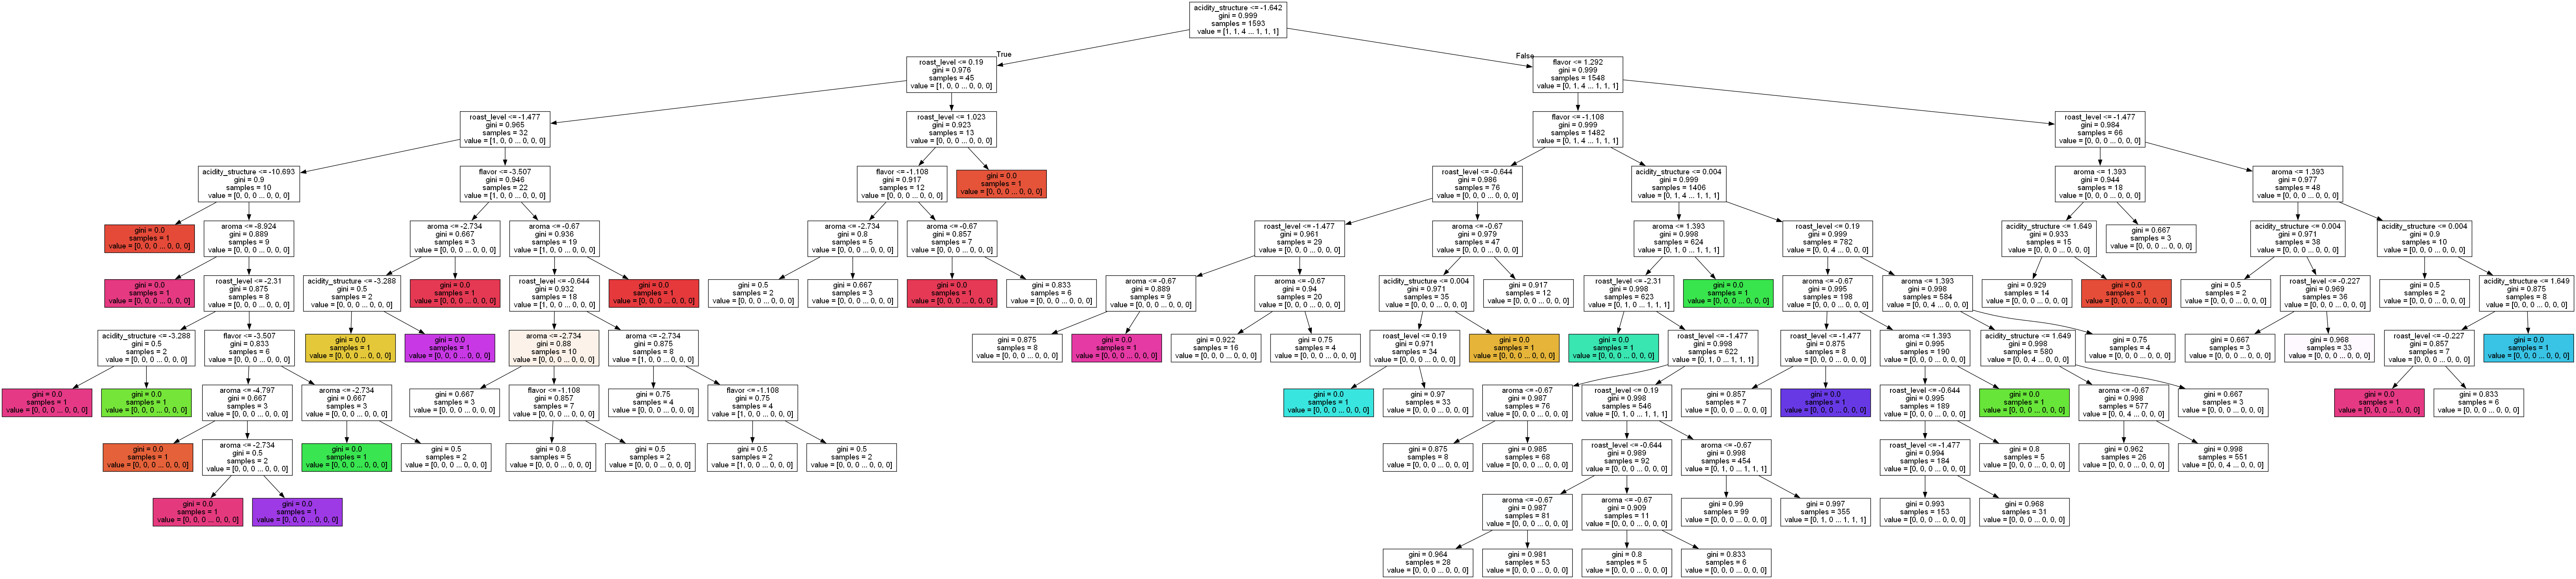

In [26]:
# Create DOT data
dot_data = tree.export_graphviz(
    model, out_file=None, feature_names=X.columns, filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())